In [1]:
using Printf
using Random
using LinearAlgebra

In [2]:
function compute_Tk(A,q,kmax)
    T = zeros(kmax, kmax)
    r = copy(q[:,1])
    beta = norm(r)
    q1 = zeros(n)

    for k = 1:kmax        
        q0 = copy(q1)
        q1 = r/beta
        r = A * q1
        alpha = dot(q1, r)
        T[k,k] = alpha
        if k > 1
            T[k-1,k] = beta
            T[k,k-1] = beta
        end
        r = r - alpha*q1 - beta*q0
        beta = norm(r)
    end
    
    return T
end

function eig_k(T,k)
    Tk = T[1:k,1:k]
    L = eigen(Tk).values # Eigenvalue estimates at step k        
    return L    
end

eig_k (generic function with 1 method)

In [3]:
n = 32
rng = MersenneTwister(18);

Q, = qr(rand(n,n))

# D = cos.(LinRange(0,π,n))
# D[div(n,2)] = 2
# D = cos.(LinRange(0,π/2,n))
D = LinRange(-1,1,n).^3


x = LinRange(0,1,n)
# D = x
# D = x.^2
# D = x.^2/2 - x.^3/3
# D = x.^5/5 - x.^4/2 + x.^3/3
# D = x.^9/9 - x.^8/2 + 6/7*x.^7 - 2/3*x.^6 + x.^5/5

A = Q * diagm(0 => D) * Q'

q = zeros(n,n)
# Random starting vector
q[:,1] = rand(n)
q[:,1] /= norm(q[:,1])

Tk = compute_Tk(A,q,n);

In [4]:
# Testing accuracy
D = eigen(A).values; D1 = eigen(Tk).values
sort!(D); sort!(D1)
@show norm(D-D1) / norm(D)

norm(D - D1) / norm(D) = 0.3505322270343858


0.3505322270343858

In [5]:
include("../load_plot_pkg.jl")
output = false

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4925829521093132644\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5894116641873706352\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4925829521093132644\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

false

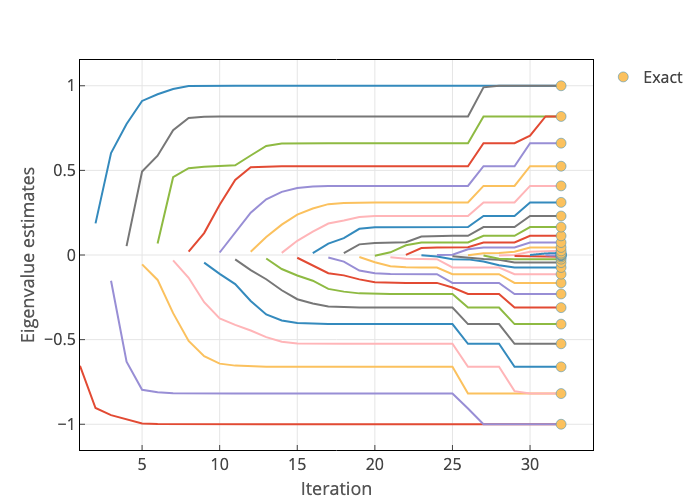

In [6]:
L = zeros(n,n)
for k=1:n
    x = eig_k(Tk,k)
    sort!(x)
    for l=1:k
        if l%2 == 1
            L[l,k] = x[(l+1)>>1]
        else
            L[l,k] = x[k-(l-2)>>1]
        end
    end
end

t = Array{PlotlyJS.AbstractTrace,1}()
for k=1:n
    push!(t,scatter(x=k:n,y=L[k,k:n],mode="lines",showlegend=false))
end
push!(t,scatter(x=n*ones(n),y=D,mode="markers",name="Exact"))

p = plot(t,Layout(xaxis_title="Iteration",yaxis_title="Eigenvalue estimates",
        width=500,height=400,margin_l=80))

In [7]:
if output
    plotToPDF(p,"lanczos_cro1")
end